# Social Network Analysis Project: Report 1
# Exploring the *Titanic* dataset

## Introduction - *Unveiling Titanic's Social Fabric: A Network Analysis*

### Group F members
The minds behind this journey are: **Leonardo Azzi**, **Sofia Bruni**, **Francesca Romana Sanna**, **Alexandra Tabarani** and **Marta Torella**, five students of the Bachelor in Management and Computer Science.

Throughout the course weeks, we aim to not only visually represent these connections but also analyze them through various graph metrics.

In our project, the **characters** aboard the Titanic take center stage as *nodes*, while the *edges* connecting them represent **shared scenes**, their *weights* reflecting the **frequency** of these shared appearences.
This analytical approach allows us to decode the complex web of interactions that shaped the destinies of the movie characters.

Through meticulous examination, we will be able to uncover the characters as well as the patterns of connection that lie underneath the narrative.

*Join us as we sail through the Titanic's data!*

### Imports
We start by importing the necessary libraries for our analysis.

In [1]:
# Basic Imports with aliases
import numpy as np 
import matplotlib.pyplot as plt
import csv
import networkx as nx

## Week 1: *Introduction to Graph Creation and Basic Analysis*

### Objective
The primary objective this week was to construct a visual representation of a graph, representing the relationships and interactions among the characters in the Titanic dataset.

### Graph Construction
In our graphical illustration:
- **Nodes** represent individual *characters* in the movie
- **Edges** indicate the presence of a *shared scene* between two characters
- **Edge weights** reflect the *frequency* of these shared scenes

### Graph Analysis
We then analyzed the graph by determining some of its basic properties:
- **Total number of nodes and edges**: to understand the *scale and complexity* of the graph
- **Average degree**: computed using the formula \(\frac{2E}{N}\), where \(E\) stands for the total number of edges and \(N\) is the number of nodes, giving an average of *connections per node*
- **Graph density**: calculated with \(D = \frac{2E}{N \times (N-1)}\), where \(D\) is the density, \(E\) is the number of edges and \(N\) is the number of nodes. This metric is useful to understand how many connections are present in the graph, compared to the maximum possible number of connections, hence providing an insight into the *overall connectivity*. The density of a graph can range from 0 to 1, with 0 indicating a graph with no edges and 1 a graph with the maximum number of edges.

### Insights gained
By computing these metrics, we were able to gain a better understanding of the graph's structure and complexity. In particular, we obtained a foundational knowledge that will be expanded upon in the following weeks.

### Loading the **Graph** from the given CSV files

In [2]:
G = nx.Graph() # Create a graph

# Read nodes from *nodes.csv* file
with open('../Graph/nodes.csv', 'r') as file:       # Open the CSV file
    reader = csv.DictReader(file)                   # DictReader is a class that reads a CSV file and converts it into a dictionary
    for row in reader:                              # Iterate over the rows of the CSV file, each row is a dictionary
        G.add_node(row['Id'], label=row['Label'])   # Add a node to the graph with the node id and label

# Read edges from *edges.csv* file
with open('../Graph/edges.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        G.add_edge(row['Source'], row['Target'], weight=int(row['Weight'])) # Add an edge to the graph with the source, target and weight


### Plotting the graph

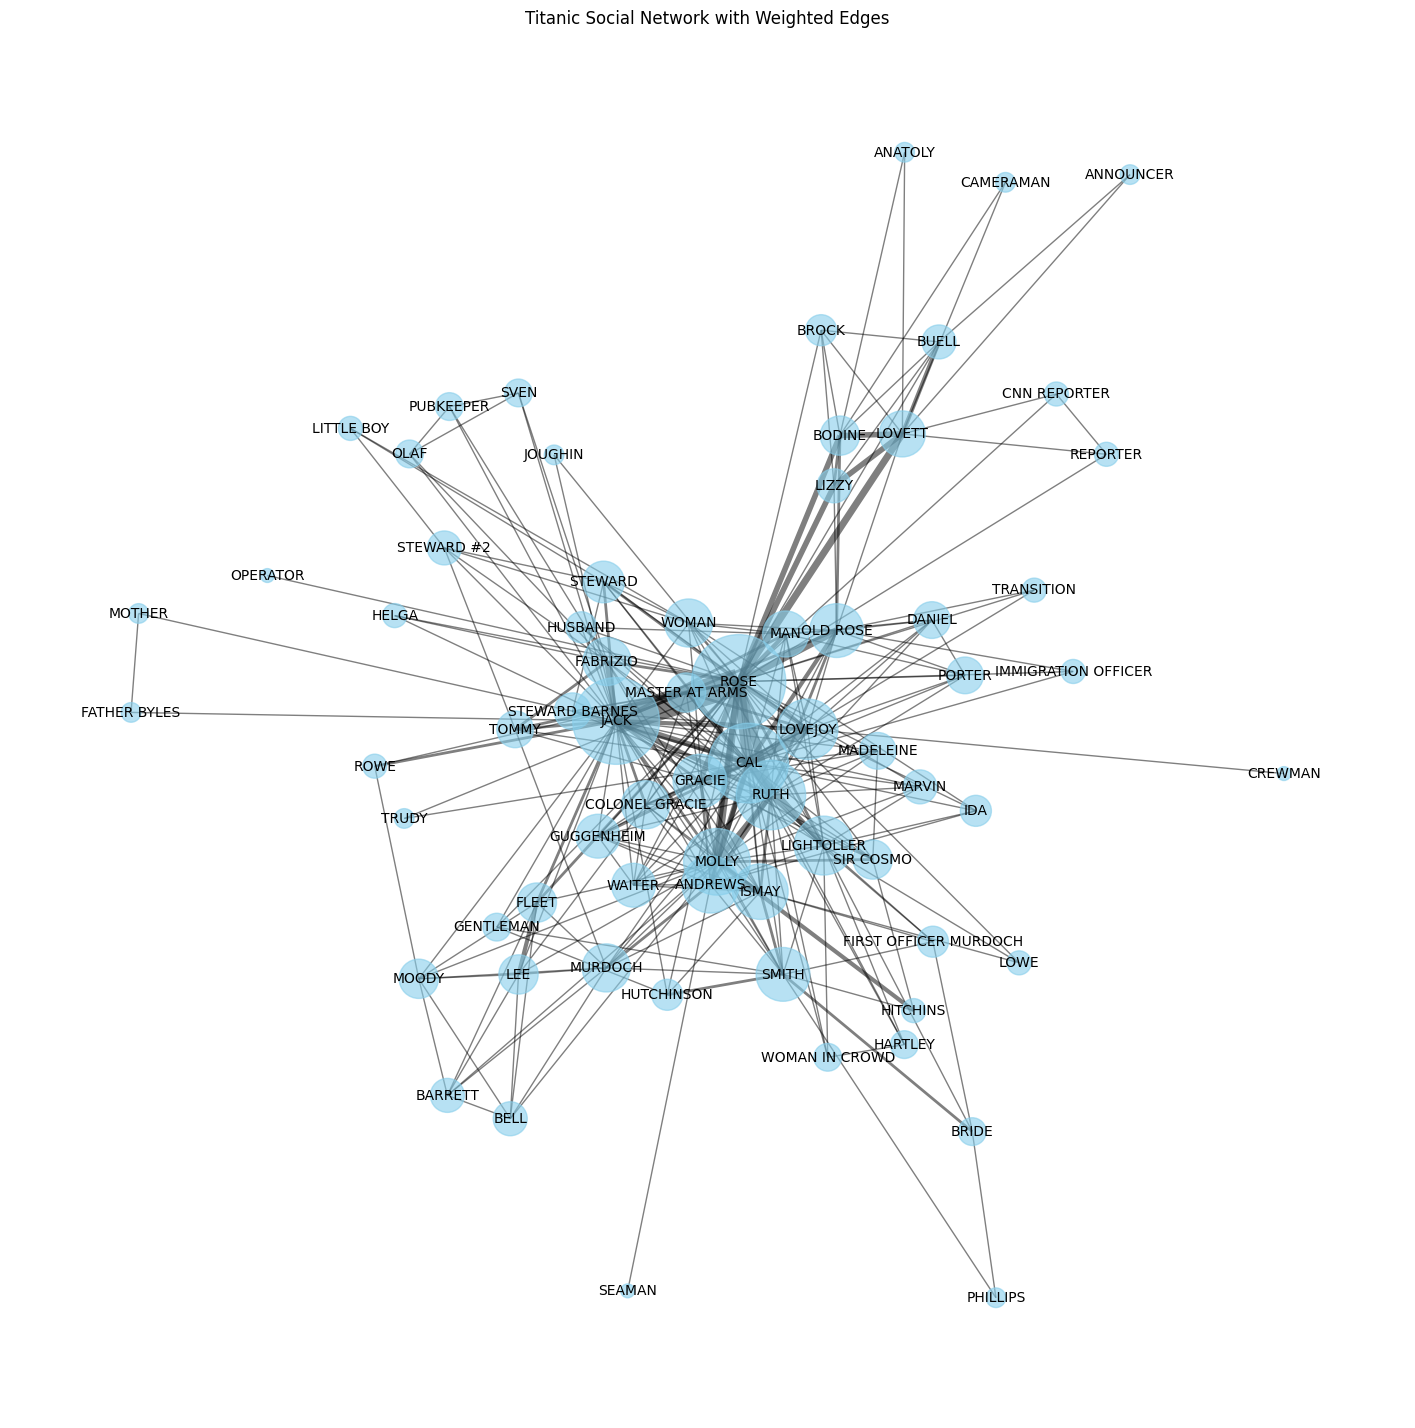

In [4]:
# Setting up the plot dimensions
plt.figure(figsize=(18, 18))

# Use the spring layout algorithm for positioning the nodes
pos = nx.spring_layout(G)

# Adjust node sizes based on their degrees
node_sizes = [v * 100 for v in dict(G.degree()).values()]

# Adjust edge widths based on their weights
edge_widths = [d['weight'] for _, _, d in G.edges(data=True)]

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.6)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=10)

plt.title("Titanic Social Network with Weighted Edges")
plt.axis("off")
plt.show()

### Graph Metrics

We found number of nodes, edges, average degree and density of the graph, using basic networkx functions.

In [10]:
#number of nodes
print("Number of nodes: ", G.number_of_nodes())

#number of edges
print("Number of edges: ", G.number_of_edges())

#average degree
print("Average degree: ", np.mean([d for n, d in G.degree()]))

#density
print("Density: ", nx.density(G))


Number of nodes:  70
Number of edges:  299
Average degree:  8.542857142857143
Density:  0.12380952380952381


## Week 2 - Small Worlds
#### Measures and Properties in Networks

### Transitivity and Average Clustering: Basic Networkx functions

In [11]:
# Compute Average Clustering
avg_clustering = nx.average_clustering(G)

# Compute Transitivity
transitivity = nx.transitivity(G)

print("Average Clustering:", avg_clustering)
print("Transitivity:", transitivity)

Average Clustering: 0.7436551486762099
Transitivity: 0.39350485027414595


## Custom Transitivity Function
#### Computing Transitivity using a custom function and basic Networkx functions

In [12]:
# Redefine the compute_transitivity function

def compute_transitivity(graph):
    # Manually count the number of triangles
    triangles = 0
    for node in graph.nodes():
        neighbors = set(graph.neighbors(node))
        for neighbor in neighbors:
            common_neighbors = set(graph.neighbors(neighbor)) & neighbors
            triangles += len(common_neighbors)
    triangles = triangles // 6  # Each triangle is counted 6 times

    # Count the number of connected triples
    connected_triples = 0
    for node in graph.nodes():
        k = len(list(graph.neighbors(node)))
        connected_triples += k * (k - 1) // 2

    # Compute transitivity
    if connected_triples == 0:
        return 0
    else:
        return (3 * triangles) / connected_triples

# Compute the transitivity for the graph
transitivity = compute_transitivity(G)
transitivity


0.39350485027414595

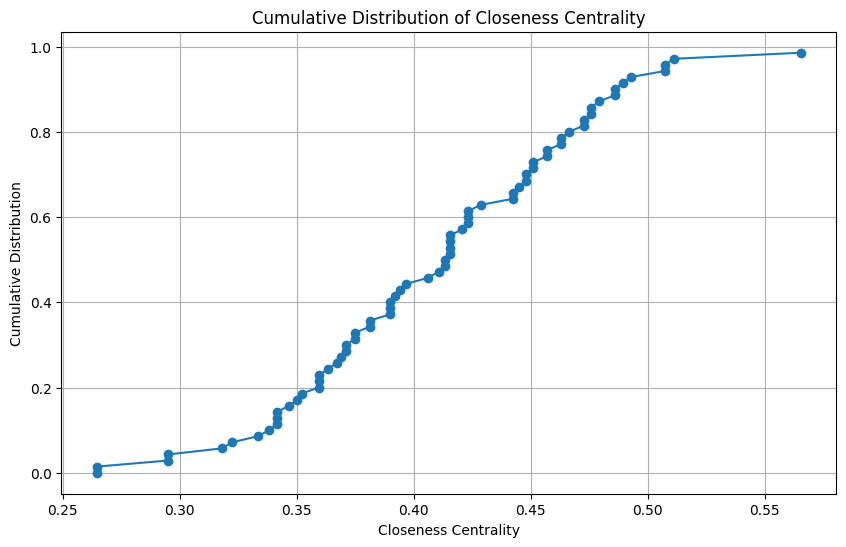

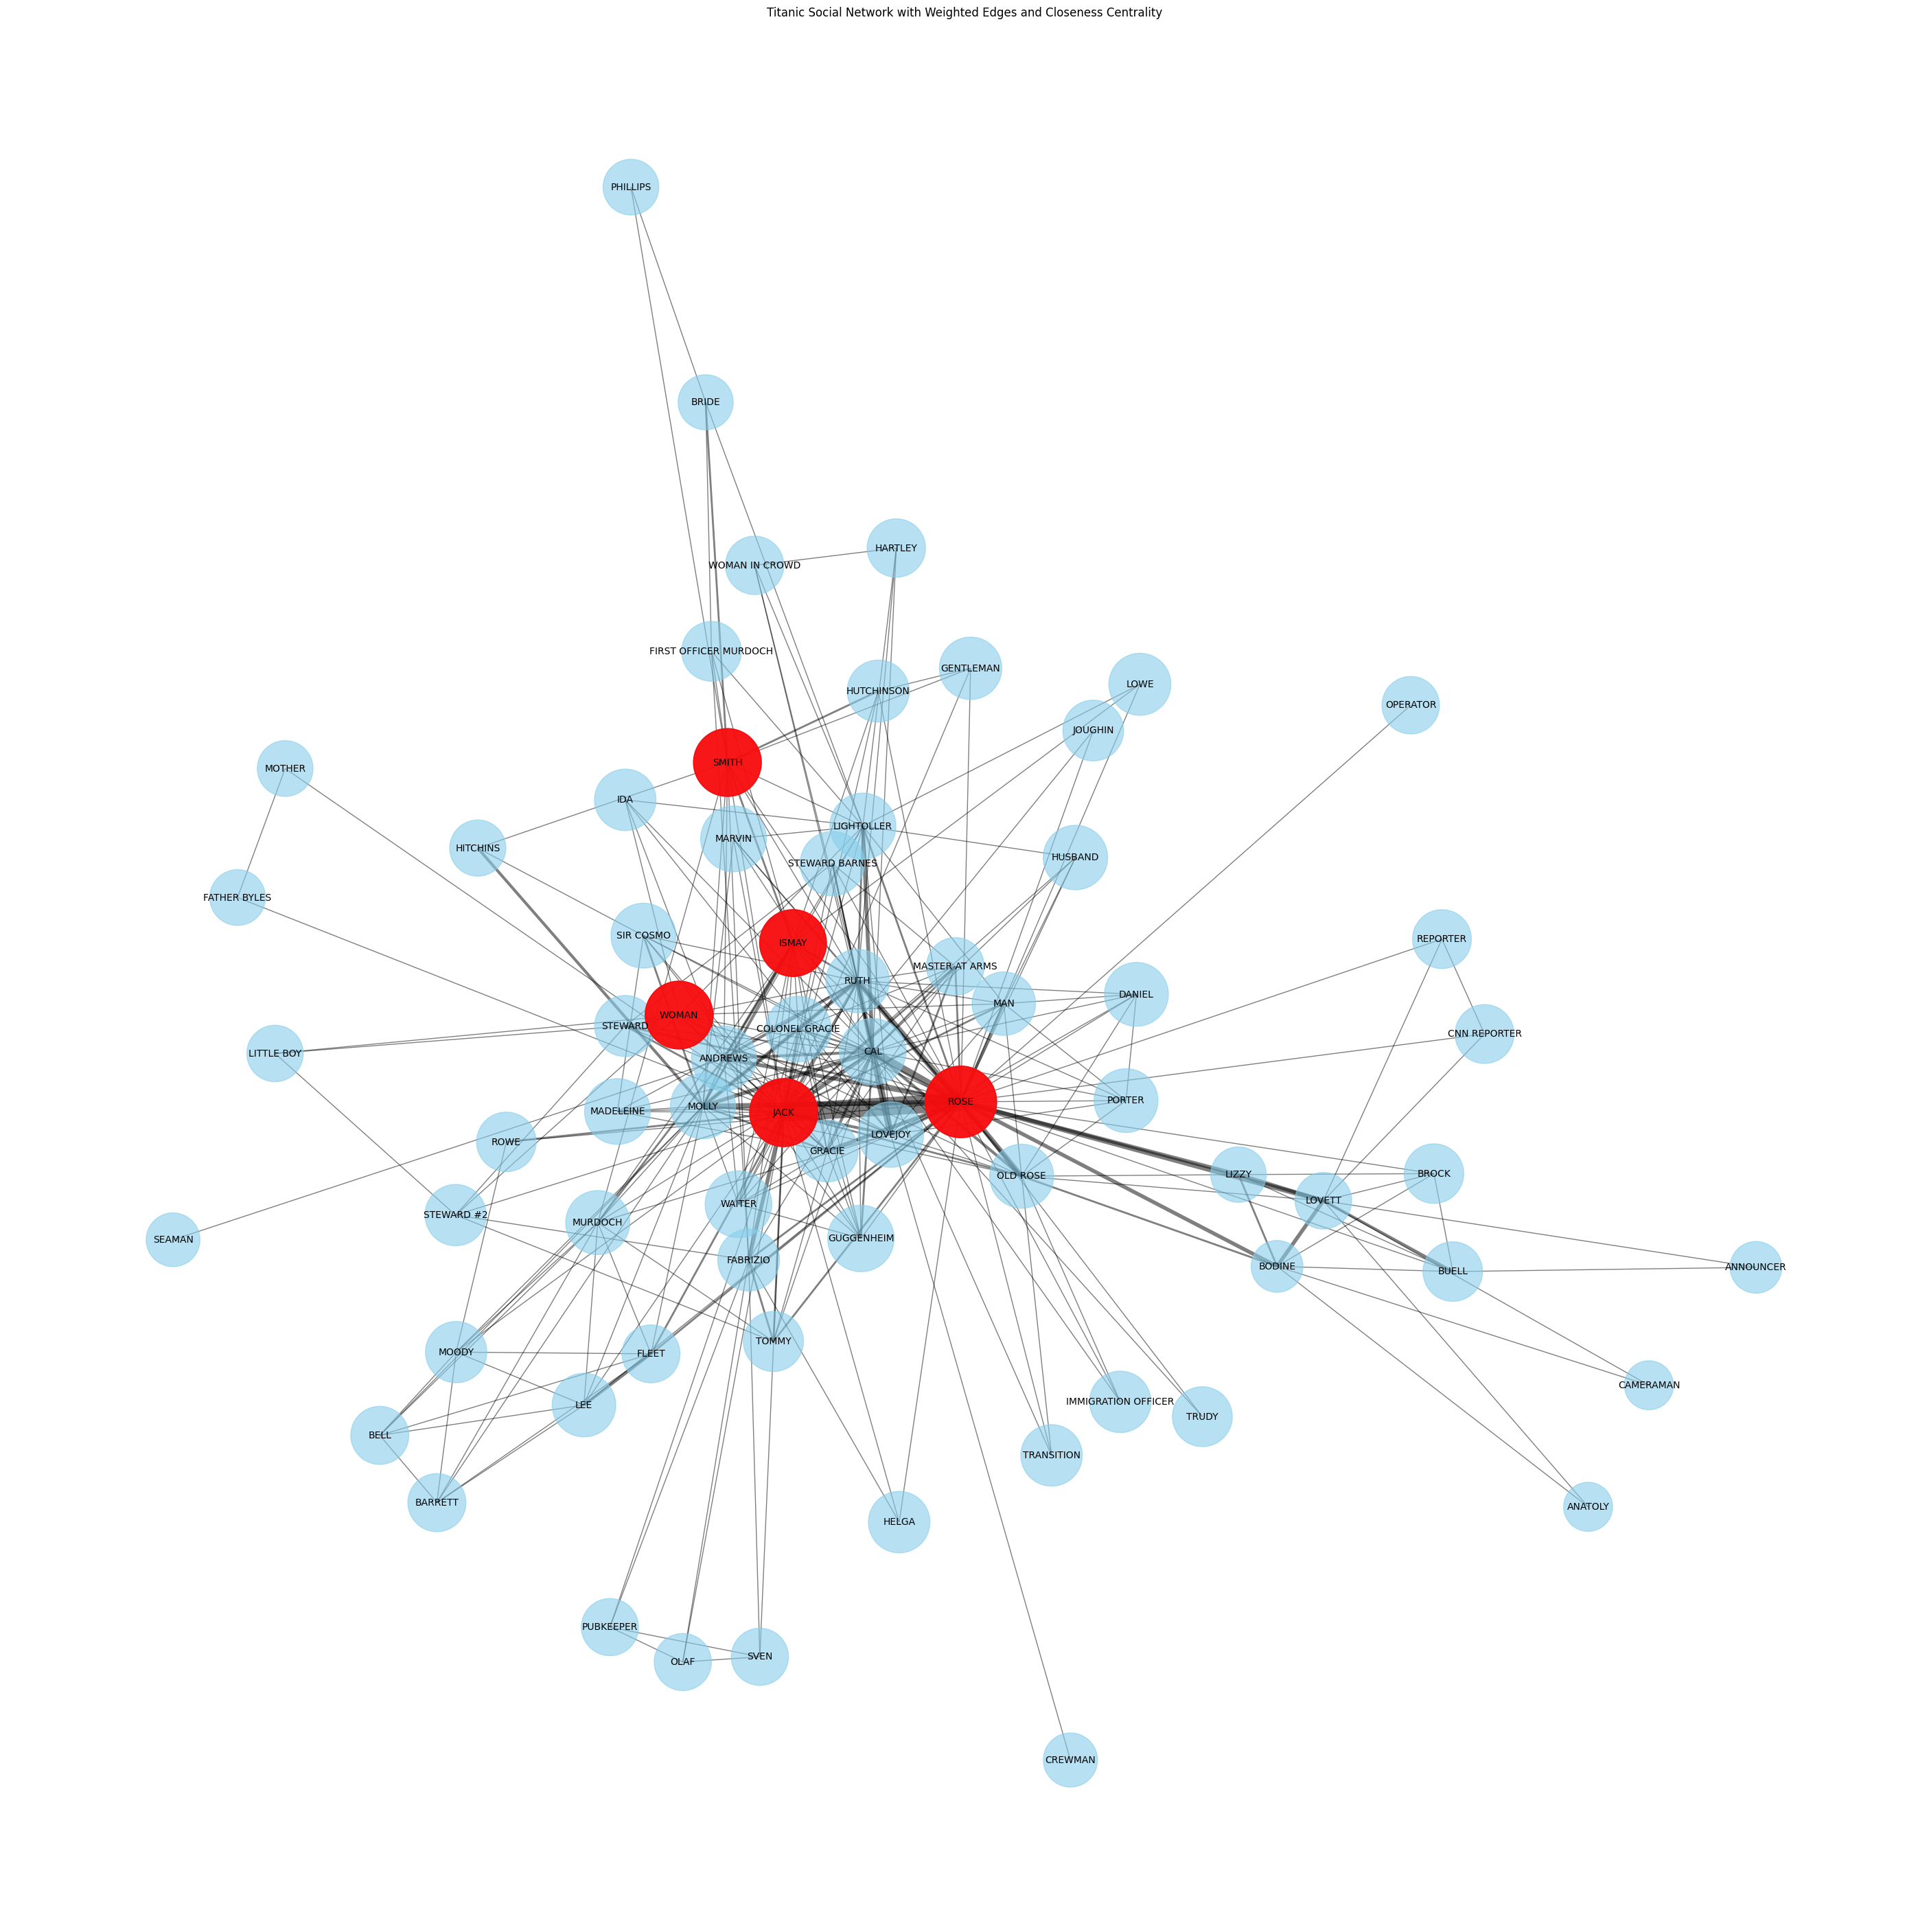

In [14]:
# Function to compute closeness centrality using basic NetworkX functions
def compute_closeness_centrality(G):
    closeness = {}
    n_minus_1 = G.number_of_nodes() - 1
    for node in G.nodes:
        shortest_path_lengths = nx.single_source_dijkstra_path_length(G, node, weight='weight')
        closeness[node] = n_minus_1 / sum(shortest_path_lengths.values())
    return closeness

# Function to plot the cumulative distribution of closeness centrality
def plot_cumulative_distribution(centrality_values, title):
    sorted_values = np.sort(list(centrality_values.values()))
    y_vals = np.arange(len(sorted_values)) / float(len(sorted_values))
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_values, y_vals, marker='o')
    plt.title(f'Cumulative Distribution of {title}')
    plt.xlabel(title)
    plt.ylabel('Cumulative Distribution')
    plt.grid(True)
    plt.show()

# Compute closeness centrality
closeness_centrality = compute_closeness_centrality(G)

# Plot the cumulative distribution for closeness centrality
plot_cumulative_distribution(closeness_centrality, 'Closeness Centrality')

# Custom plot to visualize the graph
id_to_name = nx.get_node_attributes(G, 'label')
plt.figure(figsize=(36, 36))
pos = nx.spring_layout(G, seed=42)
node_sizes = [closeness_centrality[node] * 10000 for node in G.nodes()]
edge_widths = [d['weight'] for _, _, d in G.edges(data=True)]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.6)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5)
labels = {node: id_to_name[node] for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)
top_5_nodes = list(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
nx.draw_networkx_nodes(G, pos, nodelist=[node for node, _ in top_5_nodes], node_color='red', node_size=[closeness_centrality[node] * 10000 for node, _ in top_5_nodes], alpha=0.9)
plt.title("Titanic Social Network with Weighted Edges and Closeness Centrality")
plt.axis("off")
plt.show()
